# Trying to do Ray Tracing for TERMA

### Start in 2D
- 5 rays 
- very simple
- plane is given by user:
    1. dimensions
    2. number of voxels
    3. density of each voxel (FUTURE)

In [58]:
%pylab ipympl
from scipy import interpolate
import matplotlib.pyplot as plt
# If I turn this into a script make sure to include

Populating the interactive namespace from numpy and matplotlib


In [2]:
def lineangle(x,theta):
    '''
    Each ray follows over a locally straight area.
    '''
    return x*tan(theta)

In [24]:
def plot_grid_2D(size,bins,ifig,colour='b'):
    '''
    size :: tuple
      (x size, y size) in centimeters
    
    bins :: tuple 
      (number of x bins, number of y bins)
    '''
    
    xlines = linspace(0,size[0],bins[0]+1)
    ylines = linspace(0,size[1],bins[1]+1)

    close(ifig);figure(ifig)
    plot([xlines,xlines],array((bins[0]+1)*[[0,size[1]]]).T,colour)
    plot(array((bins[1]+1)*[[0,size[0]]]).T,[ylines,ylines],colour)
        

[array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]), array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.])] [[ 0  0  0  0  0  0  0  0  0  0  0]
 [30 30 30 30 30 30 30 30 30 30 30]]


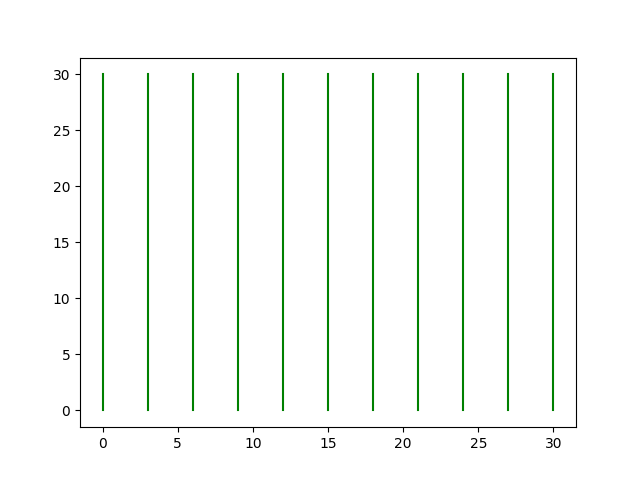

In [25]:
xsize = 30 # in cm
ysize = 30 # in cm

xbins = 10
ybins = 10

plot_grid_2D((xsize,ysize),(xbins,ybins),1,'g')

In [5]:
lines = {0:{'angle':-1},1:{'angle':-0.5},2:{'angle':0},3:{'angle':0.5},4:{'angle':1}}

ycorr = []
xtries = [0,xsize]

for n in lines.keys():
    ycorr.append([])
    for x in xtries:
        y = lineangle(x,lines[n]['angle'])
        ycorr[n].append(y)

ifig=1;figure(ifig)
for n in range(len(ycorr)):
    plot(xtries,ycorr[n],'r')

In [78]:
def plot_grid_3D(size,bins,ifig,colour='b'):
    '''
    size :: tuple
      (x size, y size, z size) in centimeters
    
    bins :: tuple 
      (number of x bins, number of y bins, number of z bins)
    '''
    xlines = linspace(0,size[0],bins[0]+1)
    ylines = linspace(0,size[1],bins[1]+1)
    zlines = linspace(0,size[2],bins[2]+1)
    
    close(ifig)
    fig = plt.figure(ifig)
    ax = plt.axes(projection='3d')
    
    for z in zlines:
        for x in xlines:
            ax.plot3D([x,x],[0,size[1]],z,colour)
        for y in ylines:
            ax.plot3D([0,size[0]],[y,y],z,colour)
    
    for y in ylines:
        for x in xlines:
            ax.plot3D([x,x],[y,y],[0,size[2]],colour)
    
    return ax,fig

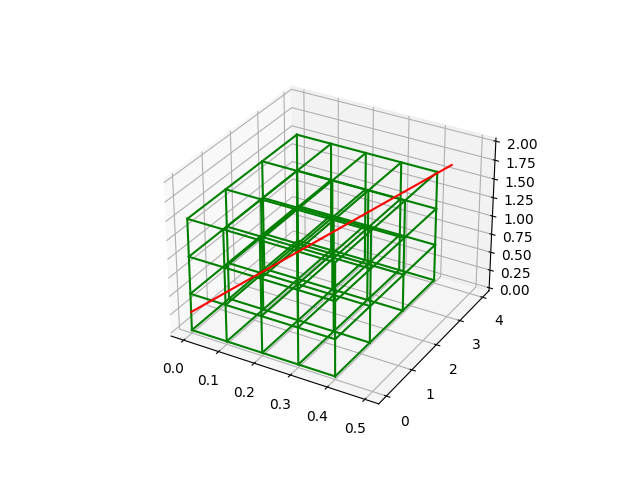

In [81]:
xsize = 0.4 # in cm
ysize = 4 # in cm
zsize = 1.5

xbins = 4
ybins = 3
zbins = 3

ax,fig = plot_grid_3D((xsize,ysize,zsize),(xbins,ybins,zbins),2,'g')

v1 = (0.5,3,2)
v2 = (0,0,0.25)

ax.plot3D((v1[0],v2[0]),(v1[1],v2[1]),(v1[2],v2[2]),'r')